In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=3,n_redundant=1,n_classes=2);


In [15]:
df = pd.DataFrame(X,columns=['F1','F2','F3'])
df['Target']=y
df


,F1,F2,F3,Target
0,1.231883,1.306394,1.169145,1
1,1.012615,1.173372,1.096892,1
2,-1.697202,-1.925390,-1.782141,0
3,2.598931,0.191864,-1.034152,1
4,-0.085204,0.029863,0.083261,0
...,...,...,...,...
995,-0.644486,-0.739725,-0.688465,0
996,0.521378,-0.023027,-0.291447,1
997,-1.559329,0.217054,1.073957,0
998,-0.860156,-0.983689,-0.913969,0


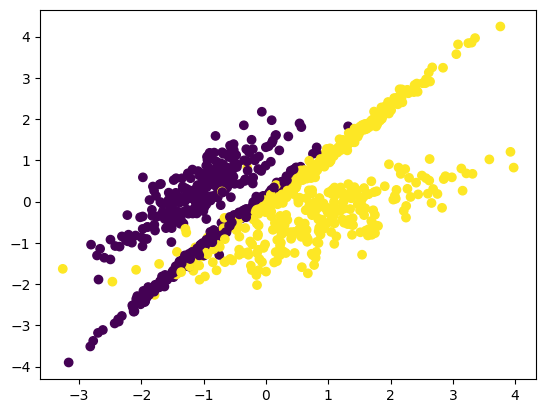

In [16]:
plt.scatter(df['F1'], df['F2'], c=df['Target'])


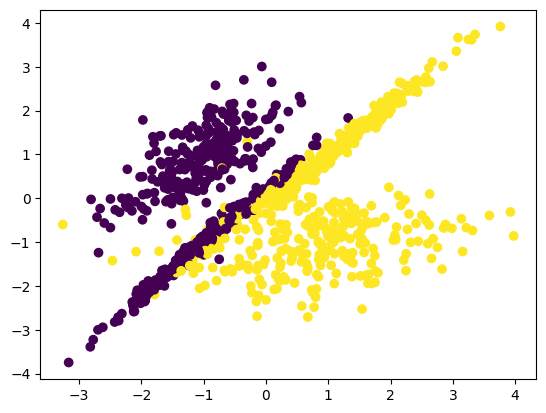

In [17]:
plt.scatter(df['F1'], df['F3'], c=df['Target'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)
# n_neighbors=5        # Number of neighbors (k) to look at for voting
# weights='uniform'    # All neighbors contribute equally to the vote
# algorithm='auto'     # Let sklearn pick best search algo (ball_tree/kd_tree/brute)
# leaf_size=30         # Tree leaf size; affects speed/memory (for ball_tree/kd_tree)
# p=2                  # Power for distance: 2=Euclidean, 1=Manhattan (Minkowski)
# metric='minkowski'   # Distance function used to find nearest neighbors
# metric_params=None   # Extra options for the metric (usually keep None)
# n_jobs=None          # CPUs to use; -1 = use all cores for parallel computation


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[166  13]
 [  6 145]]
0.9424242424242424
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       179
           1       0.92      0.96      0.94       151

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,10,20,50,100]
}
x= GridSearchCV(classifier,param_grid=param_grid)
x.fit(X_train,y_train)
y_predgrid = x.predict(X_test)
x.best_params_
x.best_score_

np.float64(0.9417910447761194)

In [24]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)


,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))



0.9189275159979495
9.009462452972217
127.45860414317289
